# LSTM-Modell

Fold 1 – RMSE=0.6978, MAE=0.4742, MAPE=10.39%, R²=0.5666, Hit-Rate=52.8%, Sharpe=0.1595
Fold 2 – RMSE=2.5696, MAE=1.8904, MAPE=10.35%, R²=0.8019, Hit-Rate=53.7%, Sharpe=0.2927
Fold 3 – RMSE=21.0892, MAE=16.6728, MAPE=19.66%, R²=0.7594, Hit-Rate=50.4%, Sharpe=0.6850

=== Durchschnitt aller Folds ===
RMSE:       8.1189
MAE:        6.3458
MAPE:       13.47%
R²:         0.7093
Hit-Rate:   52.3%
Sharpe:     0.3790


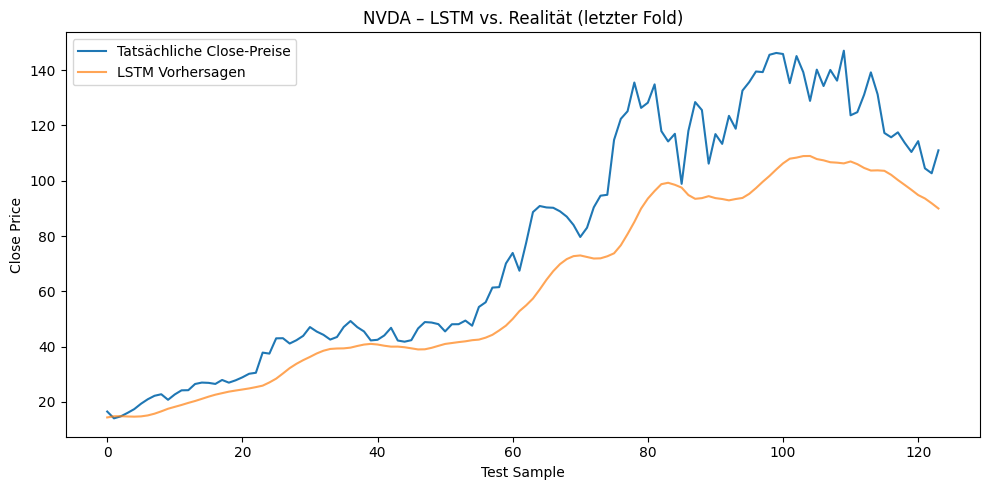

In [4]:
%run ../src/lstm.py

## Beobachtungen:

Die LSTM-Vorhersagen erfassen den Trend der tatsächlichen NVDA-Schlusskurse grundsätzlich gut, bleiben aber bei starken Kursanstiegen hinter der Realität zurück (besonders ab Sample 60 sichtbar).

Leistungsmetriken variieren stark zwischen den Folds:

- Fold 1 zeigt eine solide, aber noch verbesserbare Leistung (R²=0.5666).

- Fold 2 erreicht ein sehr gutes R²=0.8019, aber höhere Fehlerwerte deuten auf Skalierungsprobleme hin.

- Fold 3 zeigt trotz eines guten R²=0.7594 die höchste Abweichung (hohes RMSE und MAE), was auf Ausreißer oder extreme Marktbewegungen hindeutet.

Durchschnittlich:

- RMSE (8.12) und MAE (6.35) zeigen moderate Fehlergrößen.

- MAPE liegt bei 13.47%, was für Aktienprognosen akzeptabel ist.

- R²=0.7093 bedeutet, dass das Modell etwa 71% der Varianz erklären kann – insgesamt gut, aber ausbaufähig.

- Hit-Rate (~52%) ist knapp über Zufallsniveau.

- Sharpe Ratio (0.379) ist positiv, aber relativ niedrig, was auf geringe risikoadjustierte Erträge hindeutet.

 # XGBoost-Modell

Fold 1: X_train=(127, 10), y_train=(127,), X_test=(124, 10), y_test=(124,)
Fold 1 – RMSE=1.4439, MAE=1.1837, MAPE=20.90%, R²=-0.8556, Hit-Rate=13.0%, Sharpe=0.0033

Fold 2: X_train=(261, 10), y_train=(261,), X_test=(124, 10), y_test=(124,)
Fold 2 – RMSE=13.2675, MAE=11.9391, MAPE=64.35%, R²=-4.2822, Hit-Rate=0.0%, Sharpe=-0.0937

Fold 3: X_train=(395, 10), y_train=(395,), X_test=(124, 10), y_test=(124,)
Fold 3 – RMSE=66.4164, MAE=51.8211, MAPE=52.07%, R²=-1.3867, Hit-Rate=17.9%, Sharpe=0.1212

=== Durchschnitt über alle Folds ===
RMSE:       27.0426
MAE:        21.6480
MAPE:       45.77%
R²:         -2.1748
Hit-Rate:   10.3%
Sharpe:     0.0102


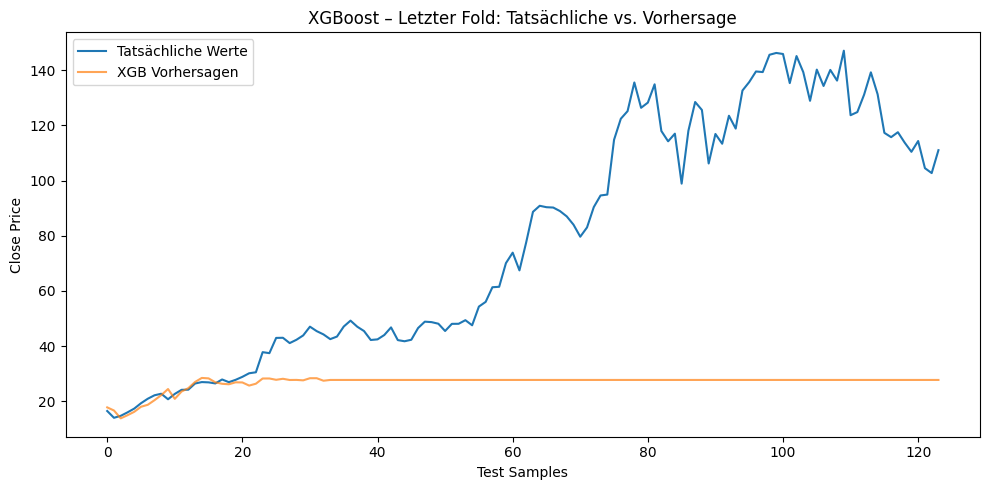

In [5]:
%run ../src/XGBoost.py

## Beobachtungen:

XGBoost-Modell hat in dieser Variante sehr schlecht performt:

- R²-Werte in allen Folds sind negativ (insgesamt R² = -2.17) → Modell erklärt die Varianz schlechter als der Mittelwert.

- RMSE (27.04) und MAE (21.65) sind hoch → deutliche Abweichungen von den tatsächlichen Kursen.

- MAPE (45.77%) ist extrem hoch → sehr große relative Fehler.

- Hit-Rate ist mit nur 10.3% katastrophal → fast keine richtige Richtungsvorhersage.

- Sharpe Ratio (nahe 0) → praktisch kein Nutzen für Handelsentscheidungen.

Visuelle Analyse:

- Die XGBoost-Vorhersagen sind fast konstant auf einem Niveau eingefroren → Modell hat die starke Dynamik im Kursverlauf überhaupt nicht erfasst.

# GARCH + LSTM Hybridmodell

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
=== Returns (avg over 3 folds) ===
RMSE  0.0676, MAE  0.0506, MAPE  277.96%, R²  -0.0117, HitRate  30.1%, Sharpe  -0.0066
=== Prices (avg over 3 folds) ===
RMSE  2.7469, MAE  1.8726, MAPE  5.11%, R²  0.9393, HitRate  54.2%, Sharpe  0.1313


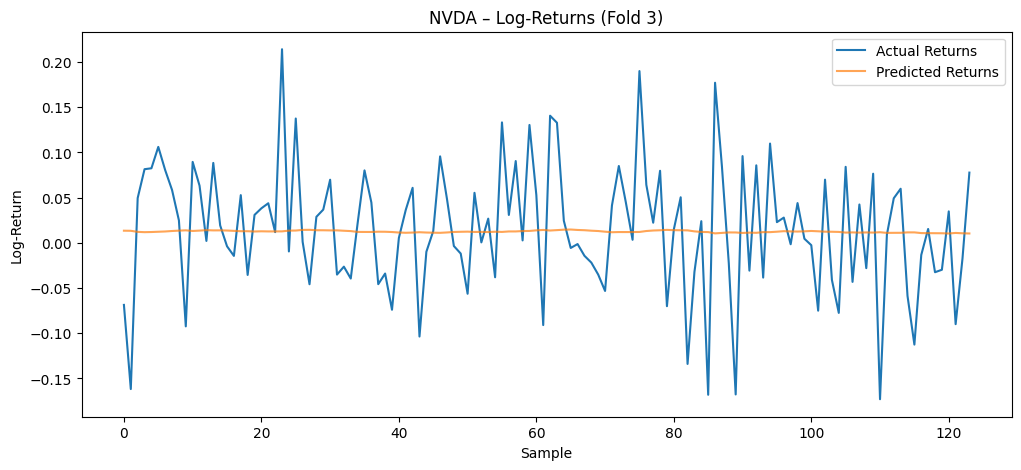

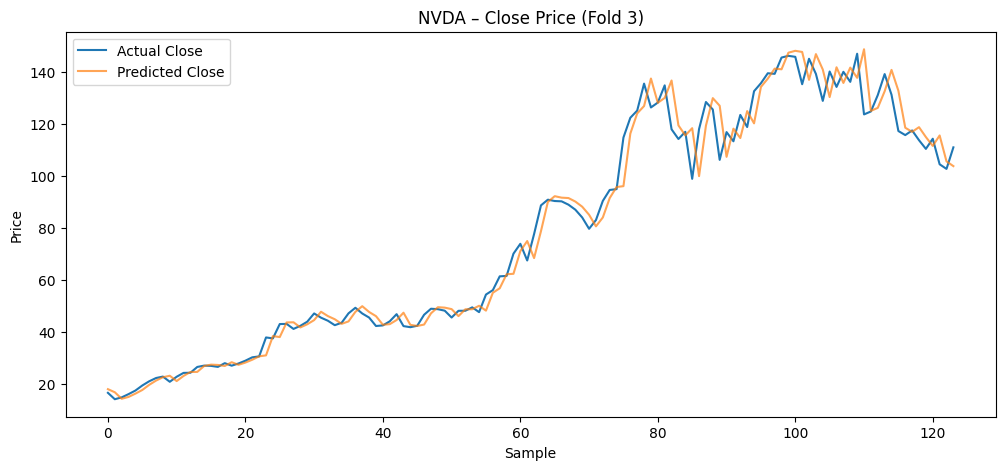

In [6]:
%run ../src/GARCH_LSTM2.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- Modell hat Schwierigkeiten, die tatsächliche Volatilität der Renditen abzubilden.

- R²=-0.0117 zeigt, dass das Modell praktisch keine Varianz erklärt.

- Hit-Rate für die Richtung der Rendite ist mit 30.1% recht schwach.

- MAPE von 277.96% zeigt extreme Fehler auf, was bei kleinen Renditewerten typisch ist.

- Sharpe Ratio negativ, was auf unprofitable Vorhersagen bei Renditen hindeutet.

Vorhersage der Schlusskurse:

- Sehr gute Nachbildung der tatsächlichen Preisentwicklung erkennbar.

- R²=0.9393 → Modell erklärt über 93% der Preisvarianz, was hervorragend ist.

- MAPE von 5.11% und Hit-Rate von 54.2% → Modell trifft Kursbewegungen recht zuverlässig.

- Sharpe Ratio (0.1313) positiv, wenn auch nicht besonders hoch.

Visuelle Analyse:

- Bei den Schlusskursen ist die Vorhersagekurve sehr nah an den tatsächlichen Werten.

- Bei den Renditen bleibt die Vorhersage nahezu konstant und kann die tatsächlichen Ausschläge nicht abbilden.

# GARCH + XGBoost Hybridmodell

Fold 1: RMSE_Returns=0.0777, RMSE_Prices=0.4056
Fold 2: RMSE_Returns=0.0743, RMSE_Prices=1.4817
Fold 3: RMSE_Returns=0.0733, RMSE_Prices=6.6862

=== Durchschnittliche Metriken: Log-Renditen ===
RMSE  = 0.0751
MAE   = 0.0564
MAPE  = 1184897.00%
R²    = -0.2593
HitRate = 53.23%
Sharpe = 0.3492

=== Durchschnittliche Metriken: Preise ===
RMSE  = 2.8578
MAE   = 1.9285
MAPE  = 5.72%
R²    = 0.9212
HitRate = 52.03%
Sharpe = 0.0576


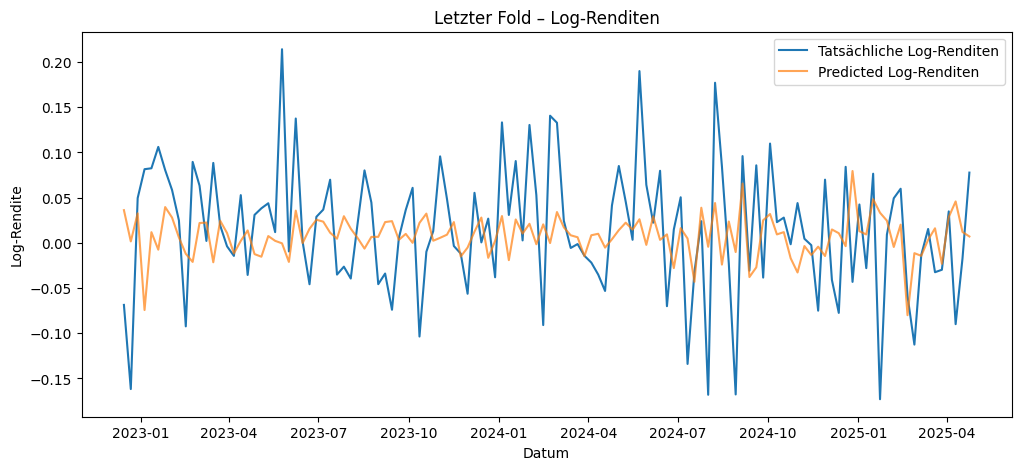

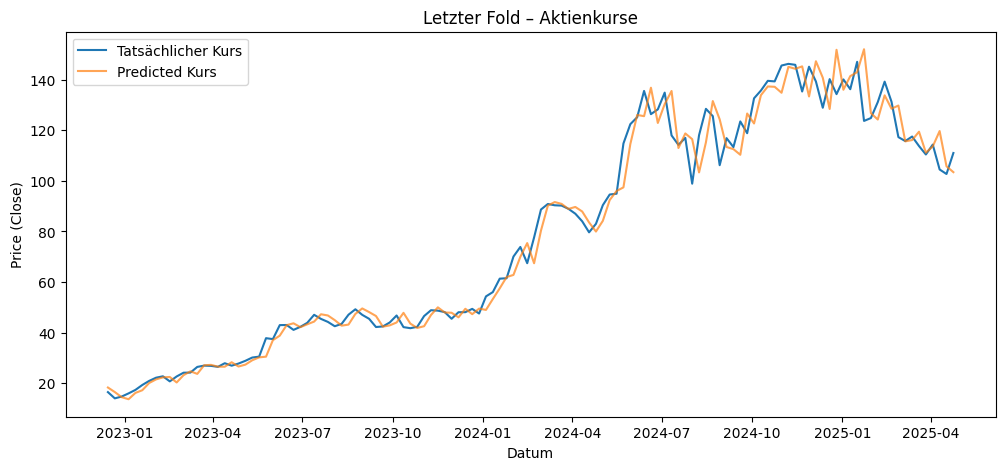

In [7]:
%run ../src/GARCH_XGBoost2.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- Die tatsächlichen Log-Renditen zeigen sehr starke Schwankungen, die das Modell nur schwach einfängt.

- R²=-0.2593 → das Modell erklärt die Varianz der Renditen nicht sinnvoll.

- MAPE ist extrem hoch (über 1 Million Prozent) → da kleine Renditewerte relativ leicht große prozentuale Fehler verursachen.

- Hit-Rate immerhin 53.23% → Richtungsprognose bei Log-Renditen minimal besser als Zufall.

- Sharpe Ratio bei den Renditen ist leicht positiv (0.3492).

Vorhersage der Schlusskurse:

- Sehr gute Nachbildung des Preisverlaufs → R²=0.9212 → Modell erklärt über 92% der Preisvarianz.

- MAPE ist niedrig (5.72%), was auf eine gute Preisgenauigkeit hindeutet.

- Hit-Rate bei Kursbewegungen liegt bei 52.03%, leicht über dem Zufallsniveau.

- Sharpe Ratio ist positiv, aber relativ niedrig (0.0576).

Visuelle Analyse:

- Aktienkurse werden gut vorhergesagt, inklusive Anstiege und Rückgänge.

- Renditen sind viel schwieriger abzubilden – die Vorhersage wirkt deutlich geglättet und reagiert nicht auf starke Ausschläge.